In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/age_gender.csv')
dataset.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [ ]:
##convert pixel from string to array
dataset['pixels']=dataset['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

In [ ]:
dataset.shape

(23705, 5)

In [ ]:
dataset.isnull().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [ ]:
dataset['pixels']=dataset['pixels'].apply(lambda x: x.reshape(48,48,1))##picture has to be 3D tenso

In [ ]:
dataset['pixels']=dataset['pixels'].apply(lambda x: x/255 )##scale the pixels

In [ ]:
dataset.age.unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99])

In [ ]:
dataset.ethnicity.unique()

array([2, 3, 4, 0, 1])

In [ ]:
dataset.gender.unique()

array([0, 1])

In [ ]:
print(sum(dataset.gender==0))##fairly balanced
print(sum(dataset.gender==1))

12391
11314


In [ ]:
dataset

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[[[0.5058824], [0.5019608], [0.5019608], [0.49..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[[[0.6431373], [0.2901961], [0.43529412], [0.6..."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[[[0.2627451], [0.27450982], [0.2784314], [0.2..."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[[[0.75686276], [0.77254903], [0.7764706], [0...."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[[[0.7921569], [0.8039216], [0.81960785], [0.8..."
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,"[[[0.49803922], [0.39215687], [0.36862746], [0..."
23701,99,1,1,20170120134639935.jpg.chip.jpg,"[[[0.09019608], [0.10980392], [0.1254902], [0...."
23702,99,2,1,20170110182418864.jpg.chip.jpg,"[[[0.23137255], [0.19607843], [0.14509805], [0..."
23703,99,2,1,20170117195405372.jpg.chip.jpg,"[[[0.1764706], [0.42352942], [0.47058824], [0...."


In [ ]:
image=[]
age=[]
ethnicity=[]
gender=[]
for i,x in enumerate(dataset.pixels):
    image.append(x)
    age.append(dataset.loc[i][0:1])
    ethnicity.append(dataset.loc[i][1:2])
    gender.append(dataset.loc[i][2:3])

In [ ]:
image=np.array(image).astype(np.float32)

In [ ]:
age=np.array(age).astype(np.float32)
ethnicity=np.array(ethnicity).astype(np.float32)
gender=np.array(gender).astype(np.float32)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
ethnicity=enc.fit_transform(ethnicity).toarray()
ethnicity

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
print(image.shape)
print(age.shape)
print(ethnicity.shape)
print(gender.shape)

(23705, 48, 48, 1)
(23705, 1)
(23705, 5)
(23705, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,age_y_train,age_y_test=train_test_split(image,age,test_size=0.2,random_state=42,shuffle=True)
x_train,x_test,ethnicity_y_train,ethnicity_y_test=train_test_split(image,ethnicity,test_size=0.2,random_state=42,shuffle=True)
x_train,x_test,gender_y_train,gender_y_test=train_test_split(image,gender,test_size=0.2,random_state=42,shuffle=True)



In [ ]:
len(x_train)

18964

In [ ]:
len(x_test)

4741

In [ ]:
print(len(age_y_train))
print(len(ethnicity_y_train))
print(len(gender_y_train))

18964
18964
18964


In [ ]:
gender_y_train

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
x_train.shape

(18964, 48, 48, 1)

In [ ]:
##Building the modle
age=tf.keras.models.Sequential()##to start the model

In [ ]:
#first convolution layer
age.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=[48, 48, 1]))
##filter is the feature map to extract the feature, 3 mean is 3*3 size
age.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
age.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))##pool_size is dimension 2*2, stride 2 like it moves 2 square

##adding second convlution layer
age.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3))

age.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
age.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

##flatten the result to make input it to Neuronal network
age.add(tf.keras.layers.Flatten())

##first fully connected layer
age.add(tf.keras.layers.Dense(units=500,activation='relu'))
age.add(tf.keras.layers.Dropout(0.2))

##second fully connected layer
age.add(tf.keras.layers.Dense(units=500,activation='relu'))
age.add(tf.keras.layers.Dropout(0.2))

##output layet
age.add(tf.keras.layers.Dense(units=1,activation='linear'))##we consider age as a regression problem


In [ ]:
##compile the model
age.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse'])

In [ ]:
age.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 21, 21, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                   

In [ ]:
age_model=age.fit(x_train, age_y_train,batch_size=32,epochs=10)

Epoch 1/10
593/593 [==============================] - 60s 99ms/step - loss: 281.8630 - mse: 281.8630
Epoch 2/10
593/593 [==============================] - 61s 103ms/step - loss: 161.0938 - mse: 161.0938
Epoch 3/10
593/593 [==============================] - 58s 99ms/step - loss: 129.4060 - mse: 129.4060
Epoch 4/10
593/593 [==============================] - 56s 95ms/step - loss: 117.6742 - mse: 117.6742
Epoch 5/10
593/593 [==============================] - 56s 95ms/step - loss: 105.3048 - mse: 105.3048
Epoch 6/10
593/593 [==============================] - 57s 97ms/step - loss: 98.6139 - mse: 98.6139
Epoch 7/10
593/593 [==============================] - 56s 95ms/step - loss: 91.8060 - mse: 91.8060
Epoch 8/10
593/593 [==============================] - 57s 96ms/step - loss: 89.6647 - mse: 89.6647
Epoch 9/10
593/593 [==============================] - 57s 95ms/step - loss: 82.8945 - mse: 82.8945
Epoch 10/10
593/593 [==============================] - 56s 95ms/step - loss: 77.2506 - mse: 77.250

In [ ]:
age.evaluate(x_test,age_y_test)

149/149 [==============================] - 3s 22ms/step - loss: 129.6876 - mse: 129.6876


[129.68759155273438, 129.68759155273438]

In [ ]:
age_y_test

array([[49.],
       [39.],
       [ 8.],
       ...,
       [ 2.],
       [52.],
       [49.]], dtype=float32)

In [ ]:
##predicting the value
age_y_pred=age.predict(x_test)
age_y_pred

149/149 [==============================] - 4s 23ms/step


array([[27.820868 ],
       [33.980164 ],
       [ 7.8712435],
       ...,
       [ 6.858086 ],
       [45.452362 ],
       [38.17873  ]], dtype=float32)

In [ ]:
np.concatenate((age_y_pred.reshape(len(age_y_pred),1),age_y_test.reshape(len(age_y_test),1)),1)##1 for verical of concatiantion and 0 for horizontal concatenation

array([[27.820868 , 49.       ],
       [33.980164 , 39.       ],
       [ 7.8712435,  8.       ],
       ...,
       [ 6.858086 ,  2.       ],
       [45.452362 , 52.       ],
       [38.17873  , 49.       ]], dtype=float32)

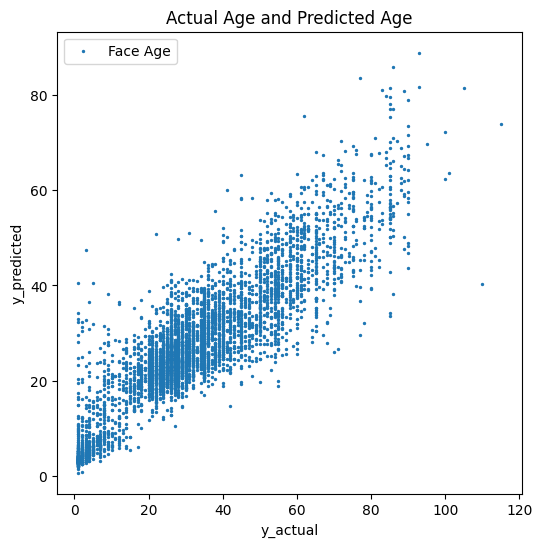

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

plt.scatter(age_y_test, age_y_pred, label="Face Age", s=2)
plt.title('Actual Age and Predicted Age')

plt.xlabel('y_actual')
plt.ylabel('y_predicted')

plt.legend()
plt.show()

In [ ]:
##Building the model for gender
gender=tf.keras.models.Sequential()##to start the model


#first convolution layer
gender.add(tf.keras.layers.Conv2D(filters=32,activation='relu',kernel_size=3,input_shape=[48, 48, 1]))
##filter is the feature map to extract the feature, 3 mean is 3*3 size
gender.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
gender.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))##pool_size is dimension 2*2, stride 2 like it moves 2 square

##adding second convlution layer
gender.add(tf.keras.layers.Conv2D(filters=64,activation='relu',kernel_size=3))

gender.add(tf.keras.layers.Dropout(0.2))##adding dropout at the visiable layer
##pooling layers
gender.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'))

##flatten the result to make input it to Neuronal network
gender.add(tf.keras.layers.Flatten())

##first fully connected layer
gender.add(tf.keras.layers.Dense(units=500,activation='relu'))
gender.add(tf.keras.layers.Dropout(0.2))

##second fully connected layer
gender.add(tf.keras.layers.Dense(units=500,activation='relu'))
gender.add(tf.keras.layers.Dropout(0.2))

##output layet
gender.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [ ]:
gender.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
gender_model=gender.fit(x_train, gender_y_train,batch_size=32,epochs=10)

Epoch 1/10
593/593 [==============================] - 58s 97ms/step - loss: 0.4212 - accuracy: 0.7960
Epoch 2/10
593/593 [==============================] - 57s 97ms/step - loss: 0.3195 - accuracy: 0.8543
Epoch 3/10
593/593 [==============================] - 57s 96ms/step - loss: 0.2858 - accuracy: 0.8724
Epoch 4/10
593/593 [==============================] - 56s 95ms/step - loss: 0.2694 - accuracy: 0.8830
Epoch 5/10
593/593 [==============================] - 58s 97ms/step - loss: 0.2462 - accuracy: 0.8930
Epoch 6/10
593/593 [==============================] - 57s 97ms/step - loss: 0.2277 - accuracy: 0.9030
Epoch 7/10
593/593 [==============================] - 57s 96ms/step - loss: 0.2034 - accuracy: 0.9127
Epoch 8/10
593/593 [==============================] - 57s 96ms/step - loss: 0.1882 - accuracy: 0.9231
Epoch 9/10
593/593 [==============================] - 57s 97ms/step - loss: 0.1692 - accuracy: 0.9306
Epoch 10/10
593/593 [==============================] - 58s 98ms/step - loss: 0.148

In [ ]:
gender.evaluate(x_test,gender_y_test)

149/149 [==============================] - 3s 18ms/step - loss: 0.2870 - accuracy: 0.8899


[0.28704315423965454, 0.8898966312408447]

In [ ]:
y_hat_gender=gender.predict(x_test)
y_predict=(y_hat_gender>0.5)##if y_predict>0.5 it will return 1 else will return 0

149/149 [==============================] - 3s 19ms/step


In [ ]:
y_predict

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
print(np.concatenate((y_predict.reshape(len(y_predict),1),gender_y_test.reshape(len(gender_y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [1. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(gender_y_test,y_predict)
print(cm)
accuracy_score(gender_y_test,y_predict)

[[2160  308]
 [ 214 2059]]


0.8898966462771567